In [1]:
from Node.Node import Control_node
from Plant.Plant import Plant
from Node.functions import *
import numpy as np
import time
import pylab as pl
from IPython import display
import matplotlib.pyplot as plt

## Single 2D Agent


In [59]:
# behavioral matrix (maps previous behavior to future behavior commands - how should I behave?)
B1 = np.array([[.1,0],
               [0,0.1]])
B2 = np.array([[0,0],
               [0,0]])

# state/system matrix (maps previous state to future state - how will others behave (give past behaviors)?)
A1 = np.array([[0.4,0],
               [0,0.4]])
A2 = np.array([[0.4,0],
               [0,0.4]])

# reference matrix (how do I expect/want others to behave? target values)
R1 = np.array([0,2])
R2 = np.array([0,0])

# Initial behavior
behav_1 = np.array([0.6,0.6])


# get the state observation (behaviors of others)
def sense(inputs):
    return inputs

# contrast reference with observations (and potentially incorporate predictions from internal model)
def compare(sensory_signal, reference, prediction):
    error = reference - sensory_signal
    return error

# generate a behavior
def control(error, behavioral_model, previous_output):
    #output = np.array([behavioral_model[i][i]*error[i] for i in range(len(error))])
    output = behavioral_model @ error
    return output


# adjusts behavioral model to get closer to behavior given 
def control_update(error, behavioral_model, previous_output):
    # LMS algorithm
    learning_rate = 0.0
    #behavioral_model = behavioral_model + learning_rate * error * previous_output
    return behavioral_model

# generate predictions on next state
def imc(system_estimate, previous_state, behavioral_model, previous_output):
    # actual estimate
    state = (system_estimate @ previous_state) + (behavioral_model @ previous_output)
    return state

# adjust system estimate to infer observations given my behavior
def imc_update(inputs, system_estimate, previous_behavior, behavioral_model, previous_state, learning_rate):
    # actual estimate
    curr_system_est = (system_estimate @ previous_state) + (behavioral_model @ previous_behavior)
    error = curr_system_est - inputs
    #learning_rate = 0.01
    system_estimate = system_estimate + learning_rate * error * previous_behavior
    return system_estimate







# agent two acts as the plant (error = control output)
def plant_control(error, behavioral_model, previous_output):
    output = previous_output + error
    return output

# just get the control output
def plant_compare(sensory_signal, reference, prediction):
    error = sensory_signal
    return error
    

In [60]:
agent1 = Control_node(sensor=sense, comparator=compare, control_update=control_update, controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, system_estimate=A1, reference=R1, init_behavior=behav_1)
plant = Control_node(sensor=sense, comparator=plant_compare, control_update=control_update,  controller = plant_control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B2, system_estimate=A2, reference=R2, init_behavior=behav_1)


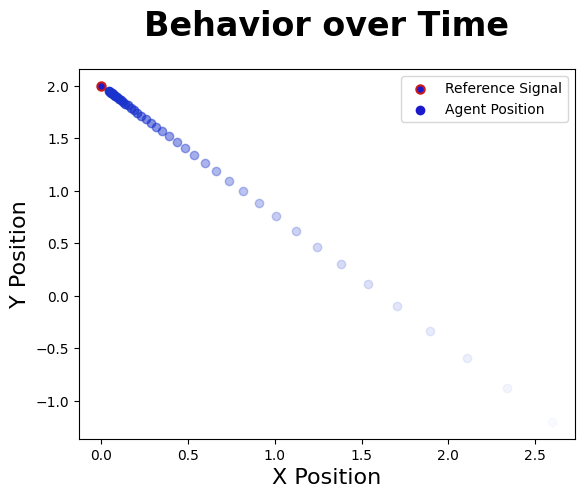

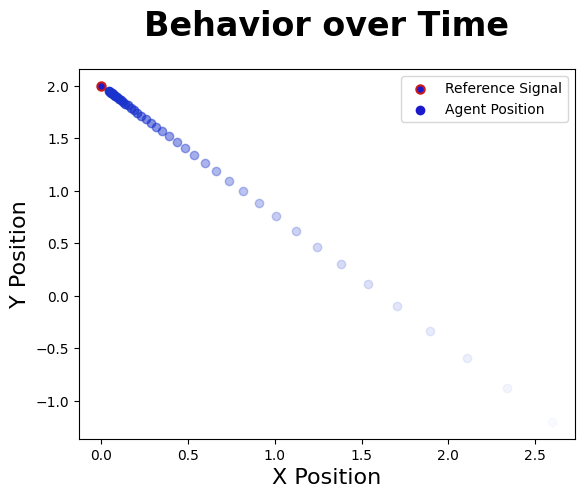

In [61]:
%matplotlib inline
trials = 40
#time = [n for n in range(trials)]
color = (0.1,0.2,0.8,0.1)
behavior1 = np.array([0,0])
controller_error = []
agent1_behaviors = []
plant_outputs = []

state = np.array([-20,20])
agent1_error = []
#hfont = {'fontname':'SuperClarendon'}
plt.scatter(R1[0],R1[1], c=(0.1,0.1,0.8), edgecolors=[0.8,0.1,0.1], linewidths=1.5)
for t in range(trials):
    b1 = agent1.go(state)   
    plant_output = plant.go(b1)

    agent1_behaviors.append(agent1.get_output())
    plant_outputs.append(plant.get_output())
    controller_error.append(agent1.get_error())
    agent1_error.append(sum(abs(agent1.get_error())/len(agent1.get_error())))

    behavior1 = b1
    state = plant_output
    
    color = [0.1,0.2,0.8, (t+1)/(trials+1)]
    plt.scatter(plant_output[0],plant_output[1],c=tuple(color))
    plt.legend([[R1[0],R1[1]], state], labels=["Reference Signal", "Agent Position"])
    lg = plt.gca().get_legend()
    lg.legendHandles[1].set_color((0.1,0.1,0.8))
    display.clear_output(wait=True)
    plt.title("Behavior over Time", weight='bold', fontsize=24, pad=24)
    plt.xlabel("X Position", fontsize=16)
    plt.ylabel("Y Position", fontsize=16)
    display.display(plt.gcf())

In [20]:
# behavioral matrix (maps previous behavior to future behavior commands - how should I behave?)
# behavioral matrix (maps previous behavior to future behavior commands - how should I behave?)
B1 = np.array([[1]])

# state/system matrix (maps previous state to future state - how will others behave (give past behaviors)?)
A1 = np.array([[1]])

# reference matrix (how do I expect/want others to behave? target values)
R1 = np.array([0.0])

# Initial behavior
behav_1 = np.array([2.2])

# transition matrix (maps control signal and previous state to current state - what behaviors do I enact given my intentions?)
T1 = np.array([0.1])



# get the state observation (behaviors of others)
def sense(inputs):
    return inputs

# contrast reference with observations (and potentially incorporate predictions from internal model)
def compare(sensory_signal, reference, prediction):
    error = reference - sensory_signal
    return error

# generate a behavior
def control(error, behavioral_model, previous_output):
    #output = np.array([behavioral_model[i][i]*error[i] for i in range(len(error))])
    output = behavioral_model @ error
    return output



# does not adjust reference
def reference_update_false(reference, error):
    k = 0
    reference = reference + (error * k)
    return reference

# dictates how control commands determine state transitions - i.e. behaviors
def transition(control_signal, transition_matrix, state):
    new_state = (transition_matrix * control_signal) + state
    return new_state


# adjusts behavioral model to get closer to behavior given 
def control_update(error, behavioral_model, previous_output):
    # LMS algorithm
    learning_rate = 0.0
    #behavioral_model = behavioral_model + learning_rate * error * previous_output
    return behavioral_model

# generate predictions on next state
def imc(system_estimate, previous_state, behavioral_model, previous_output):
    # actual estimate
    state = (system_estimate * previous_state) + (behavioral_model * previous_output)
    return state

# adjust system estimate to infer observations given my behavior
def imc_update(inputs, system_estimate, previous_behavior, behavioral_model, previous_state, learning_rate):
    # actual estimate
    #curr_system_est = (system_estimate @ previous_state) + (behavioral_model @ previous_behavior)
    #error = curr_system_est - inputs
    #learning_rate = 0.01
    #system_estimate = system_estimate + learning_rate * error * previous_behavior
    return system_estimate




# agent two acts as the plant (error = control output)
def plant_control(control_signal, transition_matrix, state):
    output = control_signal*transition_matrix + state
    return output




agent1 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_false,
controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
system_estimate=A1, reference=R1, init_behavior=behav_1)
plant1 = Plant(transition_matrix=T1, transition_function=plant_control, state=behav_1)


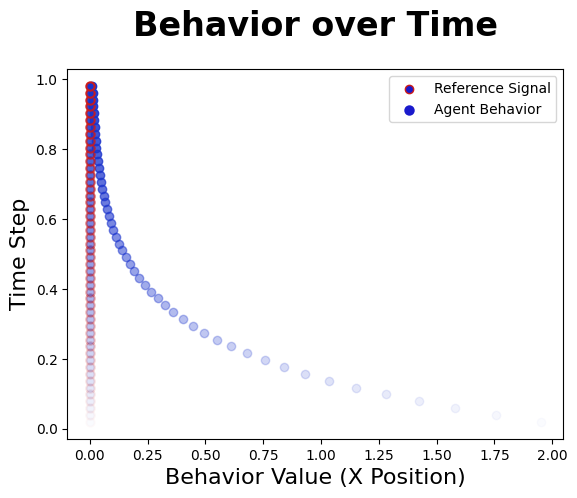

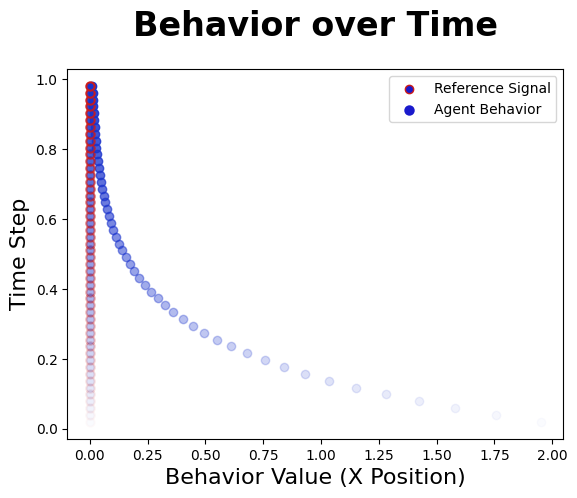

In [21]:
%matplotlib inline
trials = 50
ticks = [n for n in range(trials)]
color = (0.1,0.2,0.8,0.1)
behavior1 = np.array([0,0])
controller_error = []
agent1_behaviors = []
plant_outputs = []

state = np.array([2.5])
agent1_error = []
#hfont = {'fontname':'SuperClarendon'}
#plt.scatter(R1[0],R1[1], c=(0.1,0.1,0.8), edgecolors=[0.8,0.1,0.1], linewidths=1.5)
for t in range(trials):
    color1 = [0.1,0.2,0.8, (t+1)/(trials+1)]
    b1 = agent1.go(state)   
    plant_output = plant1.transition(b1)

    agent1_behaviors.append(agent1.get_output())
    plant_outputs.append(plant_output)
    controller_error.append(agent1.get_error())
    agent1_error.append(sum(abs(agent1.get_error())/len(agent1.get_error())))

    behavior1 = b1
    state = plant_output
    
    color = [0.1,0.1,0.8, (t+1)/(trials+1)]
    plt.scatter(plant_output[0],(t+1)/(trials+1),c=tuple(color1))
    pl.scatter(agent1.get_reference()[0],(t+1)/(trials+1),c=tuple(color1), edgecolors=[0.8,0.1,0.1, color1[3]], linewidth=1.5)
    plt.legend([[agent1.get_reference()[0], 0], state], labels=["Reference Signal", "Agent Behavior"])
    lg = plt.gca().get_legend()
    lg.legendHandles[0].set_color((0.1,0.1,0.8))
    lg.legendHandles[0].set_edgecolor((0.8,0.1,0.1))
    lg.legendHandles[1].set_color((0.1,0.1,0.8))
    display.clear_output(wait=True)
    plt.title("Behavior over Time", weight='bold', fontsize=24, pad=24)
    plt.xlabel("Behavior Value (X Position)", fontsize=16)
    plt.ylabel("Time Step", fontsize=16)
    display.display(plt.gcf())

In [19]:
agent1_behaviors

[array([-1.6]),
 array([0.891]),
 array([0.891]),
 array([0.891]),
 array([0.891]),
 array([0.891]),
 array([0.891]),
 array([0.891]),
 array([0.891]),
 array([0.891]),
 array([0.891]),
 array([0.891]),
 array([0.891]),
 array([0.891]),
 array([0.891]),
 array([0.891]),
 array([0.891]),
 array([0.891]),
 array([0.891]),
 array([0.891]),
 array([0.891]),
 array([0.891]),
 array([0.891]),
 array([0.891]),
 array([0.891]),
 array([0.891]),
 array([0.891]),
 array([0.891]),
 array([0.891]),
 array([0.891]),
 array([0.891]),
 array([0.891]),
 array([0.891]),
 array([0.891]),
 array([0.891]),
 array([0.891]),
 array([0.891]),
 array([0.891]),
 array([0.891]),
 array([0.891])]

## Double Chaotic Agents - no reference adjustments

Generally chaotic experiments don't settle around the reference since it's more likely that they just increase their error than converge. In the experiment below the hit a relatively low error point by chance and show that error of one agent is related to that of the other.

In [22]:
# behavioral matrix (maps previous behavior to future behavior commands - how should I behave?)
# behavioral matrix (maps previous behavior to future behavior commands - how should I behave?)
B1 = np.array([[1]])
B2 = np.array([[1]])

# state/system matrix (maps previous state to future state - how will others behave (give past behaviors)?)
A1 = np.array([[1]])
A2 = np.array([[1]])

# reference matrix (how do I expect/want others to behave? target values)
R1 = np.array([0.1])
R2 = np.array([0.1])

# Initial behavior
behav_1 = np.array([2.5])
behav_2 = np.array([-1.4])

# transition matrix (maps control signal and previous state to current state - what behaviors do I enact given my intentions?)
T1 = np.array([0.2])
T2 = np.array([0.2])


# get the state observation (behaviors of others)
def sense(inputs):
    perception = inputs
    return perception

# contrast reference with observations (and potentially incorporate predictions from internal model)
def compare(sensory_signal, reference, prediction):
    error = reference - sensory_signal
    return error

# generate a control signal
def control(error, behavioral_model, previous_output):
    control_signal = chaotic_controller(behavioral_model, 0.1, error)
    return control_signal

# does not adjust reference
def reference_update_false(reference, error):
    k = 0
    reference = reference + (error * k)
    return reference

# dictates how control commands determine state transitions - i.e. behaviors
def transition(control_signal, transition_matrix, state):
    new_state = (transition_matrix * control_signal) + state
    return new_state


# adjusts behavioral model to get closer to behavior given 
def control_update(error, behavioral_model, previous_output):
    # LMS algorithm
    learning_rate = 0.0
    #behavioral_model = behavioral_model + learning_rate * error * previous_output
    return behavioral_model

# generate predictions on next state
def imc(system_estimate, previous_state, behavioral_model, previous_output):
    # actual estimate
    state = (system_estimate * previous_state) + (behavioral_model * previous_output)
    return state

# adjust system estimate to infer observations given my behavior
def imc_update(inputs, system_estimate, previous_behavior, behavioral_model, previous_state, learning_rate):
    # actual estimate
    #curr_system_est = (system_estimate @ previous_state) + (behavioral_model @ previous_behavior)
    #error = curr_system_est - inputs
    #learning_rate = 0.01
    #system_estimate = system_estimate + learning_rate * error * previous_behavior
    return system_estimate




# agent two acts as the plant (error = control output)
def plant_control(error, behavioral_model, previous_output):
    output = previous_output + error
    return output

# just get the control output
def plant_compare(sensory_signal, reference, prediction):
    error = sensory_signal
    return error




agent1 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_false,
controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
system_estimate=A1, reference=R1, init_behavior=behav_1)
plant1 = Plant(transition_matrix=T1, transition_function=transition, state=behav_1)

agent2 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_false,
controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B2, 
system_estimate=A2, reference=R2, init_behavior=behav_2)
plant2 = Plant(transition_matrix=T2, transition_function=transition, state=behav_2)

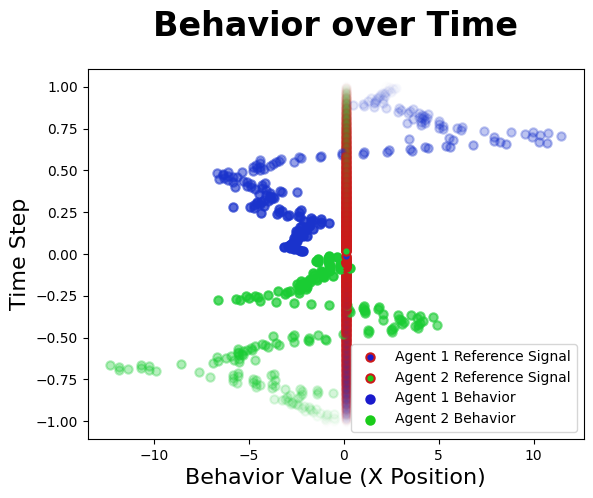

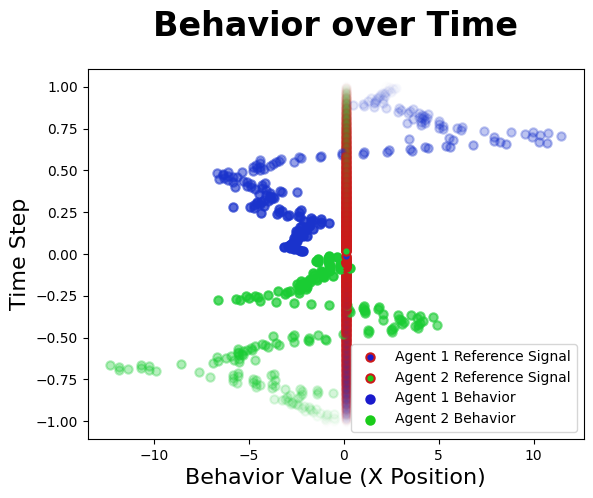

In [23]:
%matplotlib inline
np.random.seed(29)
trials = 200
color = (0.1,0.2,0.8,0.1)
agent1_control = []
agent2_control = []
agent1_behaviors = []
agent2_behaviors = []
agent1_error = []
agent2_error = []

b1 = behav_1
b2 = behav_2

#pl.scatter(R1[0],0, c=(0.1,0.8,0.8), edgecolors=[0.8,0.1,0.1], linewidths=1.5)

for t in range(trials):
    b1_control = agent1.go(b2)   
    b2_control = agent2.go(b1)

    agent1_control.append(agent1.get_output())
    agent2_control.append(agent2.get_output())

    b1 = plant1.transition(b1_control)
    b2 = plant2.transition(b2_control)

    agent1_behaviors.append(b1)
    agent2_behaviors.append(b2)

    agent1_error.append(np.absolute(agent1.get_error()))
    agent2_error.append(np.absolute(agent2.get_error()))
    
    color1 = [0.1,0.2,0.8, (t+1)/(trials+1)]
    color2 = [0.1,0.8,0.2, (t+1)/(trials+1)]
    pl.scatter(R1[0],-1+(t-1)/(trials+1), c=(0.1,0.2,0.8,color1[3]), edgecolors=[0.8,0.1,0.1, color1[3]], linewidth=1.5)
    pl.scatter(R2[0],1-(t-1)/(trials+1), c=(0.1,0.8,0.2,color2[3]), edgecolors=[0.8,0.1,0.1, color2[3]], linewidth=1.5)
    pl.scatter(b1[0],1-(t-1)/(trials+1),c=tuple(color1), linewidths=1.5)
    pl.scatter(b2[0],-1+(t-1)/(trials+1),c=tuple(color2), linewidths=1.5)
    plt.legend([[agent1.get_reference()[0],0.00],[agent2.get_reference()[0],0.00], [agent1.get_reference()[0],0.00], b2], labels=["Agent 1 Reference Signal", "Agent 2 Reference Signal", "Agent 1 Behavior", "Agent 2 Behavior"])
    lg = plt.gca().get_legend()
    lg.legendHandles[0].set_color((0.1,0.1,0.8))
    lg.legendHandles[0].set_edgecolor((0.8,0.1,0.1))
    lg.legendHandles[1].set_color((0.1,0.8,0.1))
    lg.legendHandles[1].set_edgecolor((0.8,0.1,0.1))
    lg.legendHandles[2].set_color((0.1,0.1,0.8))
    lg.legendHandles[3].set_color((0.1,0.8,0.1))
    display.clear_output(wait=True)
    display.display(pl.gcf())
    pl.title("Behavior over Time", weight='bold', fontsize=24, pad=24)
    plt.xlabel("Behavior Value (X Position)", fontsize=16)
    plt.ylabel("Time Step", fontsize=16)


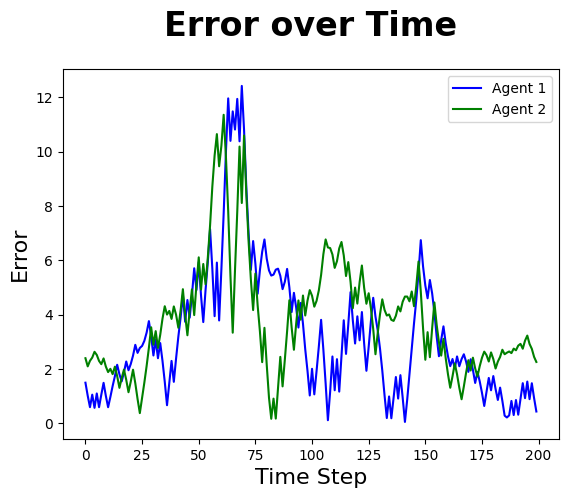

In [15]:
t = [n for n in range(trials)]
plt.plot(t, agent1_error, 'b',label="Agent 1")
plt.plot(t, agent2_error, 'g', label="Agent 2")
#plt.ylim([0, 1])
plt.legend()
plt.title("Error over Time", weight='bold', fontsize=24, pad=24)
plt.xlabel("Time Step", fontsize=16)
plt.ylabel("Error", fontsize=16)
plt.show()

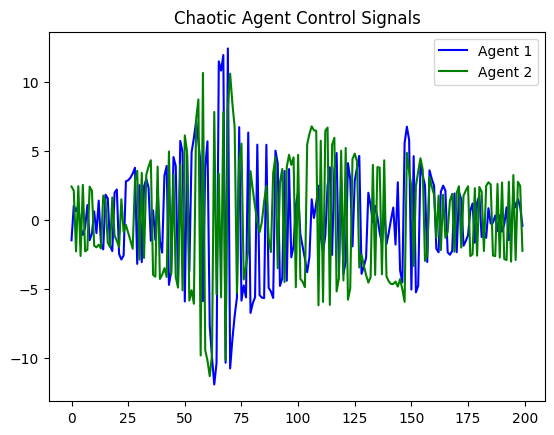

In [ ]:
t = [n for n in range(trials)]
plt.plot(t, agent1_control, 'b',label="Agent 1")
plt.plot(t, agent2_control, 'g', label="Agent 2")
#plt.ylim([0, 1])
plt.legend()
plt.title("Chaotic Agent Control Signals")
plt.show()

## Chasing References - Chaotic Agents, with one agent adjusting its reference signal

In [25]:
# behavioral matrix (maps previous behavior to future behavior commands - how should I behave?)
# behavioral matrix (maps previous behavior to future behavior commands - how should I behave?)
B1 = np.array([[1]])
B2 = np.array([[1]])

# state/system matrix (maps previous state to future state - how will others behave (give past behaviors)?)
A1 = np.array([[1]])
A2 = np.array([[1]])

# reference matrix (how do I expect/want others to behave? target values)
R1 = np.array([0.1])
R2 = np.array([-0.1])

# Initial behavior
behav_1 = np.array([2.5])
behav_2 = np.array([-2.5])

# transition matrix (maps control signal and previous state to current state - what behaviors do I enact given my intentions?)
T1 = np.array([0.2])
T2 = np.array([0.2])


# get the state observation (behaviors of others)
def sense(inputs):
    perception = inputs
    return perception

# contrast reference with observations (and potentially incorporate predictions from internal model)
def compare(sensory_signal, reference, prediction):
    error = reference - sensory_signal
    return error

# generate a control signal
def control(error, behavioral_model, previous_output):
    control_signal = chaotic_controller(behavioral_model, 0.1, error)
    return control_signal

# dictates how control commands determine state transitions - i.e. behaviors
def transition(control_signal, transition_matrix, state):
    new_state = (transition_matrix * control_signal) + state
    return new_state


# adjusts behavioral model to get closer to behavior given 
def control_update(error, behavioral_model, previous_output):
    # LMS algorithm
    learning_rate = 0.0
    #behavioral_model = behavioral_model + learning_rate * error * previous_output
    return behavioral_model

# adjusts reference given error
def reference_update_true(reference, error):
    k = 0.05
    reference = reference - (error * k)
    return reference

# does not adjust reference
def reference_update_false(reference, error):
    k = 0
    reference = reference + (error * k)
    return reference

# generate predictions on next state
def imc(system_estimate, previous_state, behavioral_model, previous_output):
    # actual estimate
    state = (system_estimate * previous_state) + (behavioral_model * previous_output)
    return state

# adjust system estimate to infer observations given my behavior
def imc_update(inputs, system_estimate, previous_behavior, behavioral_model, previous_state, learning_rate):
    # actual estimate
    #curr_system_est = (system_estimate @ previous_state) + (behavioral_model @ previous_behavior)
    #error = curr_system_est - inputs
    #learning_rate = 0.01
    #system_estimate = system_estimate + learning_rate * error * previous_behavior
    return system_estimate


agent1 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_true,
controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
system_estimate=A1, reference=R1, init_behavior=behav_1)
plant1 = Plant(transition_matrix=T1, transition_function=transition, state=behav_1)

agent2 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_false,
controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B2, 
system_estimate=A2, reference=R2, init_behavior=behav_2)
plant2 = Plant(transition_matrix=T2, transition_function=transition, state=behav_2)

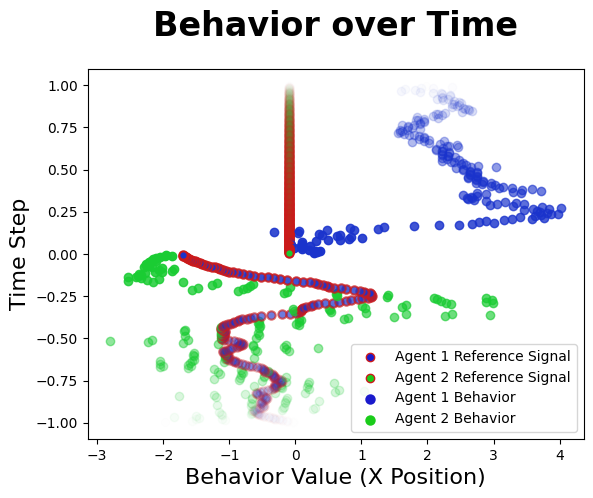

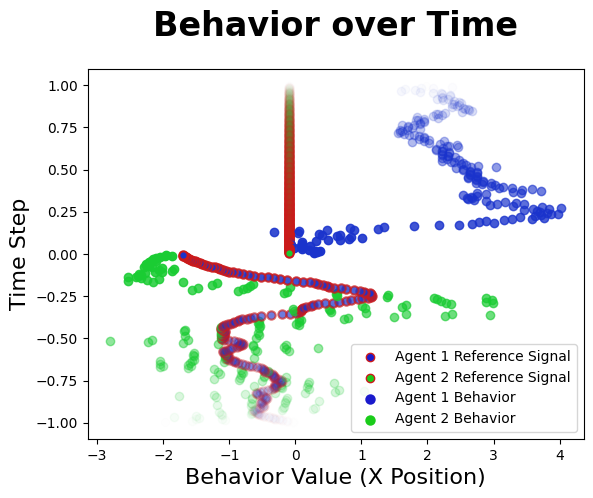

In [26]:
%matplotlib inline
np.random.seed(11)
trials = 200
color = (0.1,0.2,0.8,0.1)
agent1_control = []
agent2_control = []
agent1_behaviors = []
agent2_behaviors = []
agent1_error = []
agent2_error = []

b1 = behav_1
b2 = behav_2

for t in range(trials):
    color1 = [0.1,0.2,0.8, (t+1)/(trials+1)]
    color2 = [0.1,0.8,0.2, (t+1)/(trials+1)]
    #pl.scatter(agent1.get_reference()[0],-0.03, c=color1, edgecolors=[0.8,0.1,0.1, color1[1]])
    #pl.scatter(agent2.get_reference()[0],0, c=color2, edgecolors=[0.8,0.1,0.1, color2[3]], linewidth=1.5)
    b1_control = agent1.go(b2)   
    b2_control = agent2.go(b1)

    agent1_control.append(agent1.get_output())
    agent2_control.append(agent2.get_output())

    b1 = plant1.transition(b1_control)
    b2 = plant2.transition(b2_control)

    agent1_behaviors.append(b1)
    agent2_behaviors.append(b2)

    agent1_error.append(np.absolute(agent1.get_error()))
    agent2_error.append(np.absolute(agent2.get_error()))
    
    
    pl.scatter(b1[0],1-(t+1)/(trials+1),c=tuple(color1))
    pl.scatter(b2[0],-1+(t+1)/(trials+1),c=tuple(color2))
    pl.scatter(agent2.get_reference()[0],1-(t+1)/(trials+1),c=tuple(color2), edgecolors=[0.8,0.1,0.1, color2[3]], linewidth=1.5)
    pl.scatter(agent1.get_reference()[0],-1+(t+1)/(trials+1),c=tuple(color1), edgecolors=[0.8,0.1,0.1, color1[3]], linewidth=1.5)
    display.clear_output(wait=True)
    display.display(pl.gcf())
    plt.legend([[agent1.get_reference()[0],0.00],[agent2.get_reference()[0],0.00], [agent1.get_reference()[0],0.00], b2], labels=["Agent 1 Reference Signal", "Agent 2 Reference Signal", "Agent 1 Behavior", "Agent 2 Behavior"])
    lg = plt.gca().get_legend()
    lg.legendHandles[0].set_color((0.1,0.1,0.8))
    lg.legendHandles[0].set_edgecolor((0.8,0.1,0.1))
    lg.legendHandles[1].set_color((0.1,0.8,0.1))
    lg.legendHandles[1].set_edgecolor((0.8,0.1,0.1))
    lg.legendHandles[2].set_color((0.1,0.1,0.8))
    lg.legendHandles[3].set_color((0.1,0.8,0.1))
    pl.title("Behavior over Time", weight='bold', fontsize=24, pad=24)
    plt.xlabel("Behavior Value (X Position)", fontsize=16)
    plt.ylabel("Time Step", fontsize=16)
    #time.sleep(0.1)


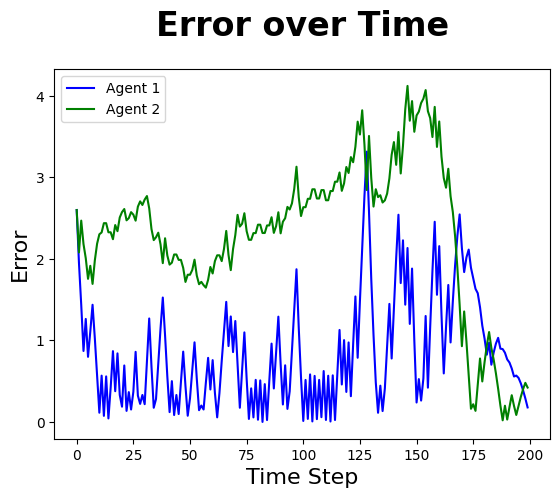

In [27]:
t = [n for n in range(trials)]
plt.plot(t, agent1_error, 'b',label="Agent 1")
plt.plot(t, agent2_error, 'g', label="Agent 2")
#plt.ylim([0, 1])
plt.legend()
plt.title("Error over Time", weight='bold',fontsize=24, pad=24)
plt.xlabel("Time Step", fontsize=16)
plt.ylabel("Error", fontsize=16)
plt.show()

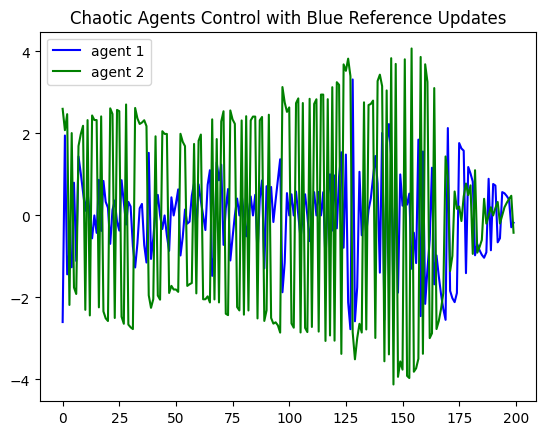

In [63]:
t = [n for n in range(trials)]
plt.plot(t, agent1_control, 'b',label="agent 1")
plt.plot(t, agent2_control, 'g', label="agent 2")
#plt.ylim([0, 1])
plt.legend()
plt.title("Chaotic Agents Control with Blue Reference Updates")
plt.show()

#### Chaotic Agents - both adjust references to "chase" observed behaviors

In [28]:
# behavioral matrix (maps previous behavior to future behavior commands - how should I behave?)
# behavioral matrix (maps previous behavior to future behavior commands - how should I behave?)
B1 = np.array([[1]])
B2 = np.array([[1]])

# state/system matrix (maps previous state to future state - how will others behave (give past behaviors)?)
A1 = np.array([[1]])
A2 = np.array([[1]])

# reference matrix (how do I expect/want others to behave? target values)
R1 = np.array([0.1])
R2 = np.array([-0.1])

# Initial behavior
behav_1 = np.array([2.5])
behav_2 = np.array([-2.5])

# transition matrix (maps control signal and previous state to current state - what behaviors do I enact given my intentions?)
T1 = np.array([0.2])
T2 = np.array([0.2])


# get the state observation (behaviors of others)
def sense(inputs):
    perception = inputs
    return perception

# contrast reference with observations (and potentially incorporate predictions from internal model)
def compare(sensory_signal, reference, prediction):
    error = reference - sensory_signal
    return error

# generate a control signal
def control(error, behavioral_model, previous_output):
    control_signal = chaotic_controller(behavioral_model, 0.1, error)
    return control_signal

# dictates how control commands determine state transitions - i.e. behaviors
def transition(control_signal, transition_matrix, state):
    new_state = (transition_matrix * control_signal) + state
    return new_state


# adjusts behavioral model to get closer to behavior given 
def control_update(error, behavioral_model, previous_output):
    # LMS algorithm
    learning_rate = 0.0
    #behavioral_model = behavioral_model + learning_rate * error * previous_output
    return behavioral_model

# adjusts reference given error
def reference_update_true(reference, error):
    k = 0.05
    reference = reference - (error * k)
    return reference

# does not adjust reference
def reference_update_false(reference, error):
    k = 0
    reference = reference + (error * k)
    return reference

# generate predictions on next state
def imc(system_estimate, previous_state, behavioral_model, previous_output):
    # actual estimate
    state = (system_estimate * previous_state) + (behavioral_model * previous_output)
    return state

# adjust system estimate to infer observations given my behavior
def imc_update(inputs, system_estimate, previous_behavior, behavioral_model, previous_state, learning_rate):
    # actual estimate
    #curr_system_est = (system_estimate @ previous_state) + (behavioral_model @ previous_behavior)
    #error = curr_system_est - inputs
    #learning_rate = 0.01
    #system_estimate = system_estimate + learning_rate * error * previous_behavior
    return system_estimate


agent1 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_true,
controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
system_estimate=A1, reference=R1, init_behavior=behav_1)
plant1 = Plant(transition_matrix=T1, transition_function=transition, state=behav_1)

agent2 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_true,
controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B2, 
system_estimate=A2, reference=R2, init_behavior=behav_2)
plant2 = Plant(transition_matrix=T2, transition_function=transition, state=behav_2)

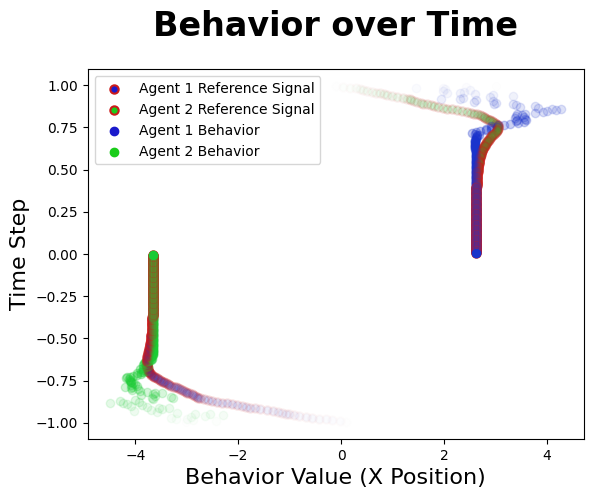

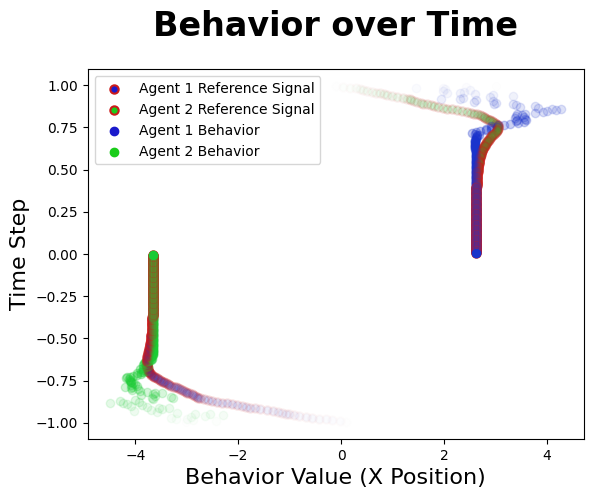

In [29]:
%matplotlib inline
np.random.seed(4)
trials = 200
color = (0.1,0.2,0.8,0.1)
agent1_control = []
agent2_control = []
agent1_behaviors = []
agent2_behaviors = []
agent1_error = []
agent2_error = []

b1 = behav_1
b2 = behav_2

for t in range(trials):
    color1 = [0.1,0.2,0.8, (t+1)/(trials+1)]
    color2 = [0.1,0.8,0.2, (t+1)/(trials+1)]
    pl.scatter(agent1.get_reference()[0],-1+color1[3], c=color1, edgecolors=[0.8,0.1,0.1, color1[3]], linewidths=1.5)
    pl.scatter(agent2.get_reference()[0],1-color2[3], c=color2, edgecolors=[0.8,0.1,0.1, color2[3]], linewidths=1.5)
    b1_control = agent1.go(b2)   
    b2_control = agent2.go(b1)

    agent1_control.append(agent1.get_output())
    agent2_control.append(agent2.get_output())

    b1 = plant1.transition(b1_control)
    b2 = plant2.transition(b2_control)

    agent1_behaviors.append(b1)
    agent2_behaviors.append(b2)

    agent1_error.append(np.absolute(agent1.get_error()))
    agent2_error.append(np.absolute(agent2.get_error()))
    
    
    pl.scatter(b1[0],1-(t+1)/(trials+1),c=tuple(color1))
    pl.scatter(b2[0],-1+(t+1)/(trials+1),c=tuple(color2))
    display.clear_output(wait=True)
    display.display(pl.gcf())
    plt.legend([[R1[0],0],[agent2.get_reference()[0],0.00], b1, b2], labels=["Agent 1 Reference Signal", "Agent 2 Reference Signal", "Agent 1 Behavior", "Agent 2 Behavior"])
    lg = plt.gca().get_legend()
    lg.legendHandles[0].set_color((0.1,0.1,0.8))
    lg.legendHandles[0].set_edgecolor((0.8,0.1,0.1))
    lg.legendHandles[1].set_color((0.1,0.8,0.1))
    lg.legendHandles[1].set_edgecolor((0.8,0.1,0.1))
    lg.legendHandles[2].set_color((0.1,0.1,0.8))
    lg.legendHandles[3].set_color((0.1,0.8,0.1))
    pl.title("Behavior over Time", weight='bold', fontsize=24, pad=24)
    plt.xlabel("Behavior Value (X Position)", fontsize=16)
    plt.ylabel("Time Step", fontsize=16)
    #time.sleep(0.1)


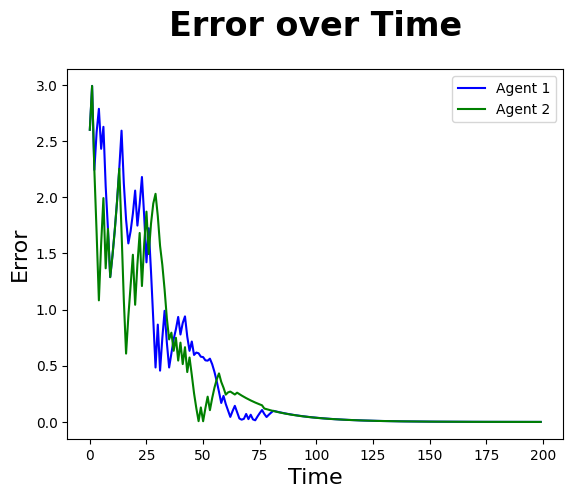

In [87]:
t = [n for n in range(trials)]
plt.plot(t, agent1_error, 'b',label="Agent 1")
plt.plot(t, agent2_error, 'g', label="Agent 2")
#plt.ylim([0, 1])
plt.legend()
plt.title("Error over Time", weight='bold', fontsize=24, pad=24)
plt.xlabel("Time Step", fontsize=16)
plt.ylabel("Error", fontsize=16)
plt.show()

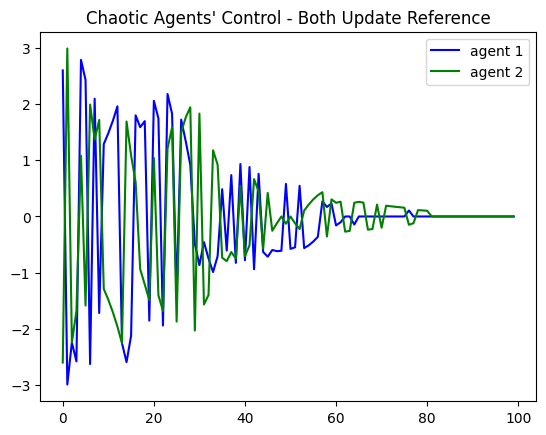

In [ ]:
t = [n for n in range(trials)]
plt.plot(t, agent1_control, 'b',label="agent 1")
plt.plot(t, agent2_control, 'g', label="agent 2")
#plt.ylim([0, 1])
plt.legend()
plt.title("Chaotic Agents' Control - Both Update Reference")
plt.show()